<a href="https://colab.research.google.com/github/Rupesh-Kataria/Data-Science-By-CodeBasics/blob/main/Part27(K_Mean_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


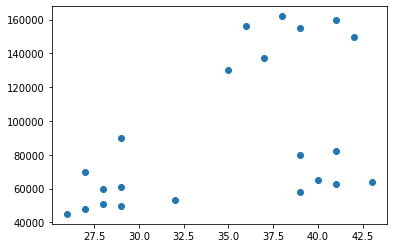

In [30]:
plt.scatter(df['Age'],df['Income($)'])

In [31]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [32]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [33]:
#Visualising this array is not easy so we will draw it .So we plot it on scatter plot so that we can see what kind of result it produces
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No handles with labels found to put in legend.


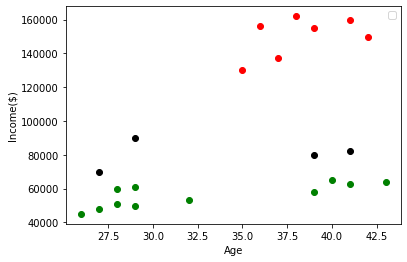

In [34]:
#Three different  dataframe for three different cluster
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [35]:
#There is a problem with two cluster in the above figure they are not grouped correctly .This problem is happening because our scaling is not right
#Our Y scale ranged from 40,000 to 16,000 and the range of X axis is pretty low.
#So when you don't feature your scale properly you might get into this problem
#That's why we need to do some min max scaler preprocessing .to scale these two features
#MinMax scaler make our scale from 0 to 1
scaler =MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df.Age=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [36]:
#Now train our scaling dataset in kmean clustering seeing what change it can cause
km=KMeans(n_clusters=3)
y_predicted =km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [37]:
df.drop('cluster',axis='columns',inplace=True)
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [40]:
#To get centroid of our clusters
km.cluster_centers_  #x and y cordinate of centroid of first cluster,second cluster,third cluster

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

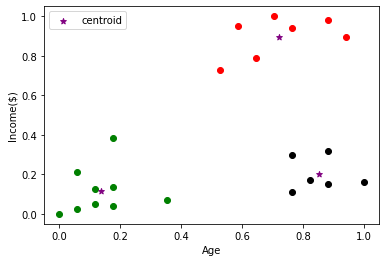

In [45]:
#clustering our scaler data
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df1.Age,df1['Income($)'],color='green',)
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid') #drawing centroid of clusters
plt.legend()


In [46]:
#Lets look at elbow method this dataset is simple with two features but it will not always like that .In real life problem you may get 20 features
#it will hard to plot in scatter plot so we use elbow method
#we plot sum of square error (sse) vs k
k_rng=range(1,10)
sse=[]
for k in k_rng:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']]) #We do this to avoid name column
  sse.append(km.inertia_)  #it give some of square error value

In [47]:
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.27558255687229766,
 0.2275446759169736,
 0.1685851223602976,
 0.14090581089405507,
 0.10497488680620906]

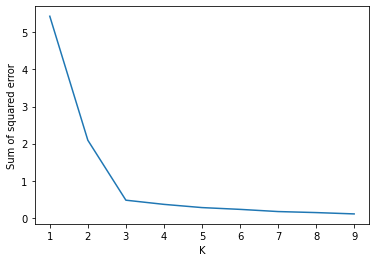

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)  #we can see k=3 for my elbow